# Face Detection Using Haar Cascades

In [29]:
#importing libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [40]:
#importing the image
barca_img = cv2.imread('barca_ucl.jpg')

In [41]:
#converting it into RGB 
barca_img = cv2.cvtColor(barca_img, cv2.COLOR_BGR2RGB)

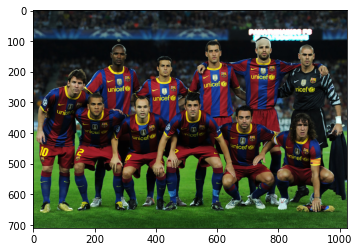

In [42]:
plt.imshow(barca_img);

In [43]:
# The haarcascade that will be used here is the frontal face default
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [44]:
def face_detect(img):
    
    face_img = img.copy()
    
    face_rects = face_cascade.detectMultiScale(face_img)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,0), 5)
        
    return face_img

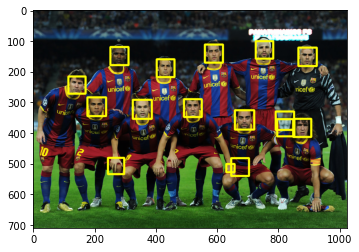

In [45]:
result = face_detect(barca_img)
plt.imshow(result);

From the above result, we can see that there are extra detections like the hand and also a blank area to the left of Puyol's face(player on the bottom right) which is not a face and we can correct this by adding  minNeighbors parameter. This parameter eliminates the False Positives. This approach basically determines how much neighborhood is required to pass it as a face rectangle.

In [56]:
def adj_face_detect(img):
    
    face_img = img.copy()
    
    face_rects = face_cascade.detectMultiScale(face_img, minNeighbors = 10)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,0), 5)
        
    return face_img

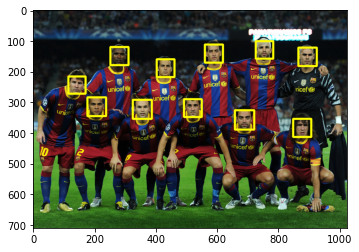

In [57]:
new_result = adj_face_detect(barca_img)
plt.imshow(new_result);

Now, we can see that after adding the two parameters, we are able to detect all  the faces correctly and no False face detection is seen. 